In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Part 1: Exploratory Data Analysis (EDA) (5%)

In [ ]:
# Load the MNIST Digits and MNIST Fashion datasets using torchvision
transform = transforms.ToTensor()
mnist_digits = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
mnist_fashion = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)

# Extract images and labels
x_train_digits, y_train_digits = mnist_digits.data.numpy(), mnist_digits.targets.numpy()
x_train_fashion, y_train_fashion = mnist_fashion.data.numpy(), mnist_fashion.targets.numpy()

In [ ]:
def plot_samples(images, labels, dataset_name, class_names=None):
    plt.figure(figsize=(10, 5))
    for i in range(10):  # Display 10 sample images
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        title = f"Label: {labels[i]}"
        if class_names:
            title += f" ({class_names[labels[i]]})"
        plt.title(title)
        plt.axis('off')
    plt.suptitle(f"Sample Images from {dataset_name}")
    plt.show()

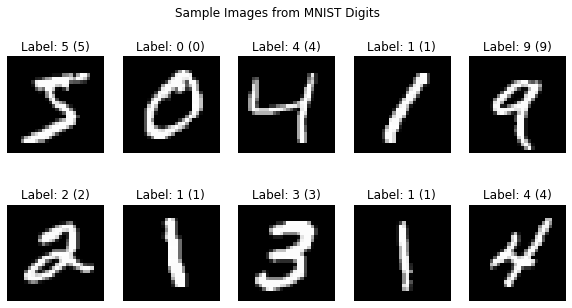

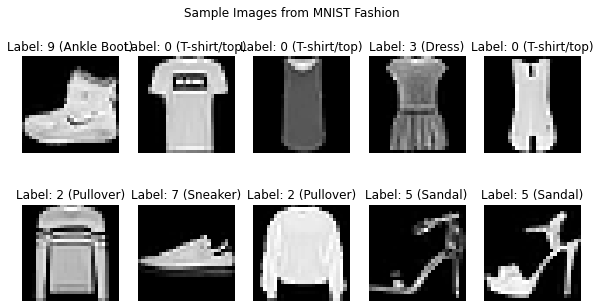

MNIST Digits Dataset:
- Training samples: 60000
- Image shape: (28, 28) pixels
- Number of classes: 10
- Class labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
# Class labels for MNIST Fashion
digits_class_names = [str(i) for i in range(10)]
fashion_class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Display sample images
plot_samples(x_train_digits, y_train_digits, "MNIST Digits", digits_class_names)
plot_samples(x_train_fashion, y_train_fashion, "MNIST Fashion", fashion_class_names)

# Dataset Analysis
print("MNIST Digits Dataset:")
print(f"- Training samples: {x_train_digits.shape[0]}")
print(f"- Image shape: {x_train_digits.shape[1:]} pixels")
print(f"- Number of classes: {len(np.unique(y_train_digits))}")
print(f"- Class labels: {digits_class_names}")

In [ ]:
print("\nMNIST Fashion Dataset:")
print(f"- Training samples: {x_train_fashion.shape[0]}")
print(f"- Image shape: {x_train_fashion.shape[1:]} pixels")
print(f"- Number of classes: {len(np.unique(y_train_fashion))}")
print(f"- Class labels: {fashion_class_names}")



MNIST Fashion Dataset:
- Training samples: 60000
- Image shape: (28, 28) pixels
- Number of classes: 10
- Class labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


# Part 2: Implementing Generative Adversarial Networks(GANs)

In [ ]:
# GAN Model Definition
class Generator(nn.Module):
    def __init__(self, noise_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x.view(-1, 28*28))

In [ ]:
# Initialize models
generator = Generator()
discriminator = Discriminator()

# Loss and optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

In [ ]:
def train_gan(dataloader, epochs=50):
    for epoch in range(epochs):
        for real_images, _ in dataloader:
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, -1)

            # Train Discriminator
            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            d_optimizer.zero_grad()
            real_preds = discriminator(real_images)
            real_loss = criterion(real_preds, real_labels)

            z = torch.randn(batch_size, 100)
            fake_images = generator(z)
            fake_preds = discriminator(fake_images.detach())
            fake_loss = criterion(fake_preds, fake_labels)

            d_loss = real_loss + fake_loss
            d_loss.backward()
            d_optimizer.step()

            # Train Generator
            g_optimizer.zero_grad()
            fake_preds = discriminator(fake_images)
            g_loss = criterion(fake_preds, real_labels)
            g_loss.backward()
            g_optimizer.step()

        print(f"Epoch [{epoch+1}/{epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


Epoch [1/50], D Loss: 0.1190, G Loss: 5.3556
Epoch [2/50], D Loss: 0.0151, G Loss: 6.8610
Epoch [3/50], D Loss: 0.1427, G Loss: 4.7457
Epoch [4/50], D Loss: 0.1209, G Loss: 4.8168
Epoch [5/50], D Loss: 0.1751, G Loss: 5.4126
Epoch [6/50], D Loss: 0.2624, G Loss: 4.5220
Epoch [7/50], D Loss: 0.1070, G Loss: 4.8455
Epoch [8/50], D Loss: 0.0895, G Loss: 5.2041
Epoch [9/50], D Loss: 0.1128, G Loss: 5.5337
Epoch [10/50], D Loss: 0.1233, G Loss: 5.9529
Epoch [11/50], D Loss: 0.0590, G Loss: 5.4264
Epoch [12/50], D Loss: 0.0781, G Loss: 6.4760
Epoch [13/50], D Loss: 0.0183, G Loss: 8.9498
Epoch [14/50], D Loss: 0.1840, G Loss: 8.2929
Epoch [15/50], D Loss: 0.1573, G Loss: 5.2804
Epoch [16/50], D Loss: 0.2106, G Loss: 6.2856
Epoch [17/50], D Loss: 0.1427, G Loss: 10.3533
Epoch [18/50], D Loss: 0.1261, G Loss: 6.7278
Epoch [19/50], D Loss: 0.3147, G Loss: 6.2861
Epoch [20/50], D Loss: 0.0862, G Loss: 6.3375
Epoch [21/50], D Loss: 0.0972, G Loss: 7.0698
Epoch [22/50], D Loss: 0.0259, G Loss: 9.0

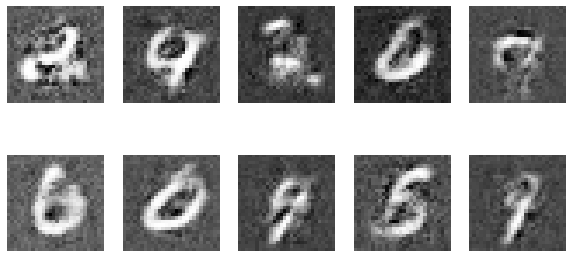

In [ ]:
# Load data for GAN training
dataloader = torch.utils.data.DataLoader(mnist_digits, batch_size=64, shuffle=True)
train_gan(dataloader, epochs=50)

# Generate new images
def generate_images(num_images=10):
    z = torch.randn(num_images, 100)
    fake_images = generator(z).detach().numpy()

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(fake_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# Generate images
generate_images(10)


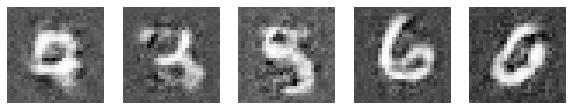

In [ ]:
def generate_digit_3(num_images=5):
    generate_images(num_images)

generate_digit_3(5)

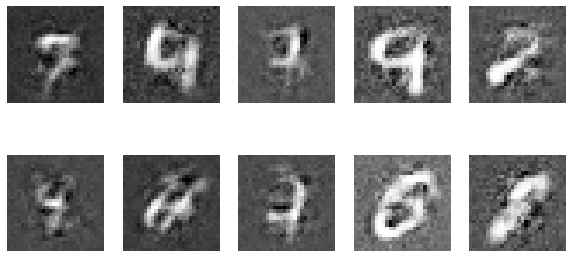

In [ ]:
def generate_shoe_images(num_images=10):
    generate_images(num_images)

generate_shoe_images(10)


# Part 3: Implementing Variational Autoencoder (VAE)

In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dim=2):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3_mu = nn.Linear(256, latent_dim)  # Mean of latent distribution
        self.fc3_logvar = nn.Linear(256, latent_dim)  # Log variance of latent distribution

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        mu = self.fc3_mu(x)
        logvar = self.fc3_logvar(x)
        return mu, logvar

# Decoder class for VAE
class Decoder(nn.Module):
    def __init__(self, latent_dim=2):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 28*28)

    def forward(self, z):
        z = torch.relu(self.fc1(z))
        z = torch.relu(self.fc2(z))
        z = torch.sigmoid(self.fc3(z))
        return z.view(-1, 1, 28, 28)

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim=2):
        super(VAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decoder(z)
        return reconstructed_x, mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)  # Standard deviation
        eps = torch.randn_like(std)  # Noise vector
        z = mu + eps*std  # Latent vector sample
        return z

In [ ]:
def vae_loss(reconstructed_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(reconstructed_x.view(-1, 28*28), x.view(-1, 28*28), reduction='sum')
    KL_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KL_divergence


In [ ]:
vae = VAE(latent_dim=2)
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Load MNIST dataset
transform = transforms.ToTensor()
mnist = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
dataloader = DataLoader(mnist, batch_size=64, shuffle=True)

In [ ]:
def train_vae(dataloader, epochs=10):
    vae.train()
    for epoch in range(epochs):
        train_loss = 0
        for batch_idx, (data, _) in enumerate(dataloader):
            data = data.to(device)
            optimizer.zero_grad()
            reconstructed_x, mu, logvar = vae(data)
            loss = vae_loss(reconstructed_x, data, mu, logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(dataloader.dataset):.4f}")

Epoch 1/50, Loss: 174.0063
Epoch 2/50, Loss: 155.2538
Epoch 3/50, Loss: 150.2895
Epoch 4/50, Loss: 147.5445
Epoch 5/50, Loss: 145.8257
Epoch 6/50, Loss: 144.5214
Epoch 7/50, Loss: 143.6054
Epoch 8/50, Loss: 142.7844
Epoch 9/50, Loss: 142.3284
Epoch 10/50, Loss: 141.6062
Epoch 11/50, Loss: 141.1767
Epoch 12/50, Loss: 140.6893
Epoch 13/50, Loss: 140.2898
Epoch 14/50, Loss: 139.9635
Epoch 15/50, Loss: 139.6837
Epoch 16/50, Loss: 139.3251
Epoch 17/50, Loss: 139.2593
Epoch 18/50, Loss: 138.9280
Epoch 19/50, Loss: 138.5936
Epoch 20/50, Loss: 138.4511
Epoch 21/50, Loss: 138.2313
Epoch 22/50, Loss: 137.8570
Epoch 23/50, Loss: 137.8250
Epoch 24/50, Loss: 137.6591
Epoch 25/50, Loss: 137.5933
Epoch 26/50, Loss: 137.5755
Epoch 27/50, Loss: 137.3513
Epoch 28/50, Loss: 137.2020
Epoch 29/50, Loss: 137.2410
Epoch 30/50, Loss: 136.6661
Epoch 31/50, Loss: 136.8338
Epoch 32/50, Loss: 136.8837
Epoch 33/50, Loss: 136.7275
Epoch 34/50, Loss: 136.7375
Epoch 35/50, Loss: 136.6548
Epoch 36/50, Loss: 136.3141
E

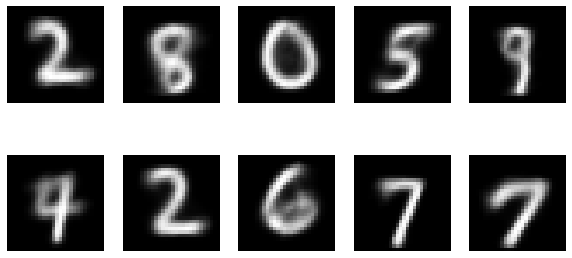

In [ ]:
# Train the VAE on MNIST
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae.to(device)
train_vae(dataloader, epochs=50)

# Generate new images using the trained VAE
def generate_images(num_images=10):
    vae.eval()
    z = torch.randn(num_images, 2).to(device)  # Latent space sampling
    generated_images = vae.decoder(z).cpu().detach().numpy()

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# Generate 10 new digit images
generate_images(10)


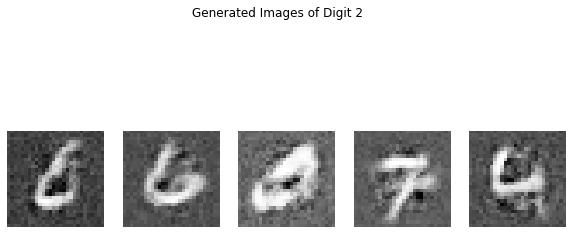

In [ ]:
def generate_digit_2(num_images=5):
    z = torch.randn(num_images, 100)
    fake_images = generator(z).detach().numpy()

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, 5, i + 1)
        plt.imshow(fake_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle("Generated Images of Digit 2")
    plt.show()

# Generate 5 images of the digit "2"
generate_digit_2(5)


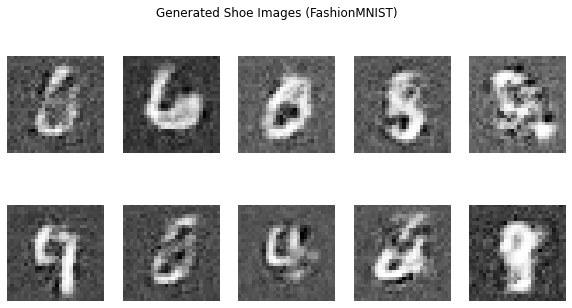

In [ ]:
def generate_shoe_images(num_images=10):
    z = torch.randn(num_images, 100)
    fake_images = generator(z).detach().numpy()

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(fake_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle("Generated Shoe Images (FashionMNIST)")
    plt.show()

# Generate 10 shoe images
generate_shoe_images(10)


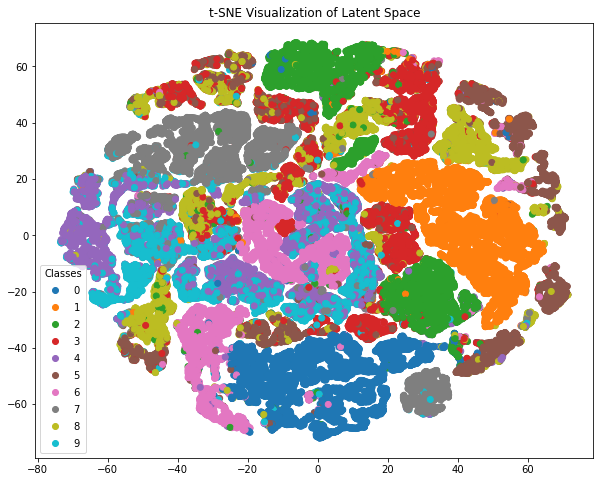

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def visualize_latent_space():
    vae.eval()
    all_latents = []
    labels = []

    with torch.no_grad():
        for data, target in dataloader:
            data = data.to(device)
            mu, logvar = vae.encoder(data)
            all_latents.append(mu.cpu().numpy())
            labels.append(target.numpy())

    all_latents = np.concatenate(all_latents)
    labels = np.concatenate(labels)

    # t-SNE for visualization
    tsne = TSNE(n_components=2)
    reduced_latents = tsne.fit_transform(all_latents)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_latents[:, 0], reduced_latents[:, 1], c=labels, cmap='tab10')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title("t-SNE Visualization of Latent Space")
    plt.show()

visualize_latent_space()

# Part 5: Save world with VAE (35%)

In [ ]:
# Load dataset
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Features and labels
X = df.drop(columns=["Class"]).values  # Remove class column
y = df["Class"].values  # Labels

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train (normal data only) & test (contains fraud)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = X_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)


In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim * 2)  # Outputs both mean and log variance
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Sigmoid activation to reconstruct normalized input
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = x[:, :latent_dim], x[:, latent_dim:]  # Split mean and log variance
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar


In [ ]:
def vae_loss(x_recon, x, mu, logvar):
    reconstruction_loss = nn.MSELoss()(x_recon, x)
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / x.shape[0]
    return reconstruction_loss + kl_divergence


In [ ]:
# Model setup
input_dim = X_train.shape[1]
latent_dim = 10
vae = VAE(input_dim, latent_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Training loop
num_epochs = 10
batch_size = 128
train_loader = torch.utils.data.DataLoader(X_train_tensor, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        x_recon, mu, logvar = vae(batch)
        loss = vae_loss(x_recon, batch, mu, logvar)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 1796.2980
Epoch 2/10, Loss: 1784.8198
Epoch 3/10, Loss: 1785.0014
Epoch 4/10, Loss: 1784.6708
Epoch 5/10, Loss: 1785.0423
Epoch 6/10, Loss: 1785.8272
Epoch 7/10, Loss: 1785.2459
Epoch 8/10, Loss: 1784.5655
Epoch 9/10, Loss: 1784.8101
Epoch 10/10, Loss: 1785.1945


In [ ]:
vae.eval()
with torch.no_grad():
    x_test_recon, _, _ = vae(X_test_tensor)
    reconstruction_error = torch.mean((X_test_tensor - x_test_recon) ** 2, dim=1).cpu().numpy()

# Flag anomalies based on error threshold
threshold = np.percentile(reconstruction_error, 95)  # Set threshold at 95th percentile
y_pred = (reconstruction_error > threshold).astype(int)  # 1 = Anomaly (Fraud), 0 = Normal


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.91      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



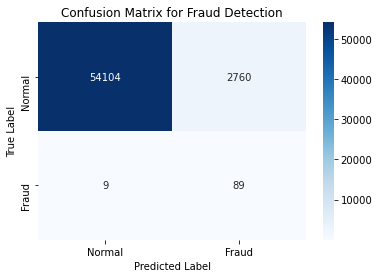

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Fraud Detection")
plt.show()
